# Object detection

In [1]:
# import libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Template matching

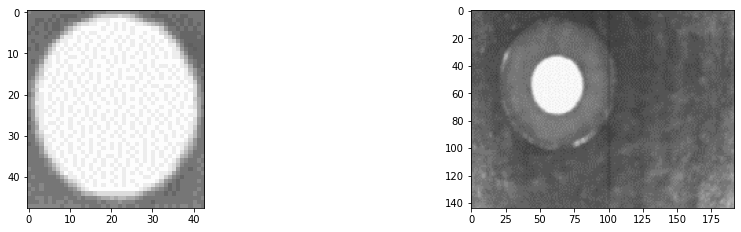

In [2]:
# load images

dataset_path = 'data/'

#load template image
logo = cv2.imread(os.path.join(dataset_path, 'fiducial.png'))
#logo = cv2.resize(logo, (0,0), fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR);
logo = np.float32(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))/256.0
ch, w, h = logo.shape[::-1]

#load query image
#img1 = cv2.imread(os.path.join(dataset_path, 'map_planckendael.png'))
img1 = cv2.imread(os.path.join(dataset_path, 'pcb_1.png'))
#img1 = cv2.resize(img1, (0,0), fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR);
img1 = np.float32(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))/256.0  # Convert from cv's BRG default color order to RGB

#plot images
plt.figure(figsize=(16, 8))
plt.subplot(221),plt.imshow(logo)
plt.subplot(222),plt.imshow(img1)
plt.show()

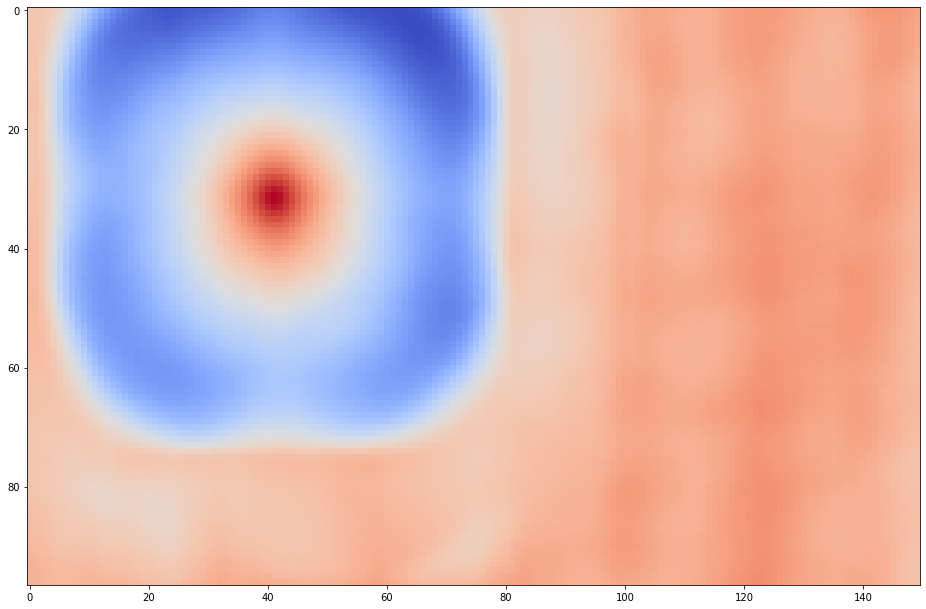

In [3]:
#compute normalized cross correllation map
res = cv2.matchTemplate(img1,logo,cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

#plot cross correllation heatmap
cv2.rectangle(img1,top_left, bottom_right, 255, 2)
plt.figure(figsize=(16, 16))
plt.imshow(res, cmap="coolwarm")
plt.show()

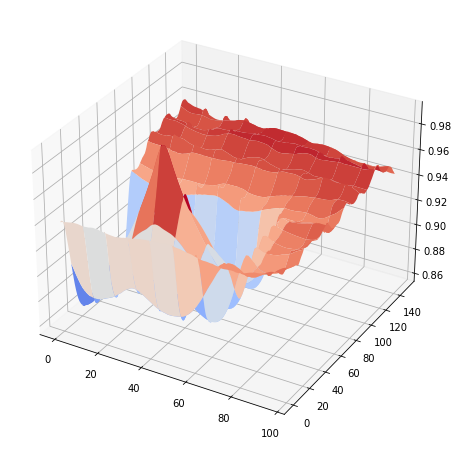

In [4]:
#plot 3D heatmap
xx, yy = np.mgrid[0:res.shape[0], 0:res.shape[1]]

# create the figure
fig = plt.figure(figsize=(16, 8))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, res, cmap="coolwarm", rstride=10, cstride=10, linewidth=0)
plt.show()

(array([30, 30, 31, 31, 31, 32, 32, 32, 33, 33]), array([41, 42, 40, 41, 42, 40, 41, 42, 41, 42]))
found 10 matches


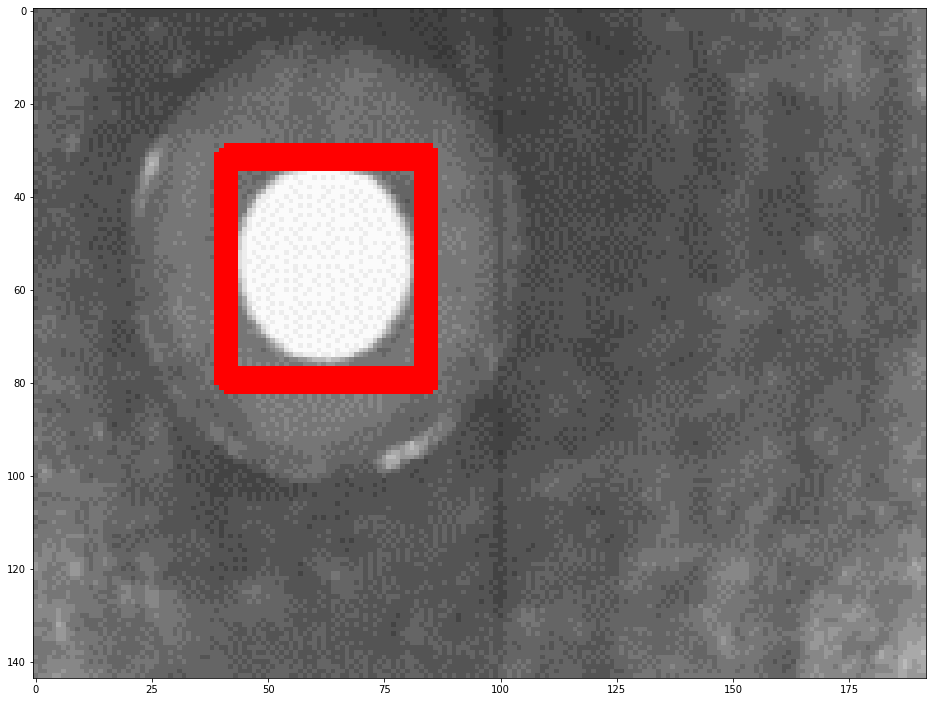

True

In [5]:
#now find multiple occurences
threshold = 0.99
loc = np.where( res >= threshold)
print(loc)
print("found "+str(len(loc[0]))+" matches")
for pt in zip(*loc[::-1]):
    cv2.rectangle(img1, pt, (pt[0] + w, pt[1] + h), 1.0, 2)

#plot and save image    
plt.figure(figsize=(16, 16))
plt.imshow(img1)
plt.show()
img1_save = cv2.cvtColor(img1*256, cv2.COLOR_RGB2BGR)
cv2.imwrite("result_playgrounds.png",img1_save)